In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d

In [4]:
def dy_dt(y, t, omega, fcf):
    y1, y2, y3, y4 = y
    if abs(y1) < 1e-12:
        y1 = eps
    return [y2, 2*omega*y1*y4 + y1*(fcf * omega**2 + y4**2), y4, -(2*y2/y1)*(omega+y4)]

In [39]:
R = 1000e3  # m
omega = 0.18 * np.pi/180 # degrees/s, convert to rad/s
omega_0 = 0
v0 = -omega * R
y0 = [R, v0, omega_0, -omega]
fcf = 1

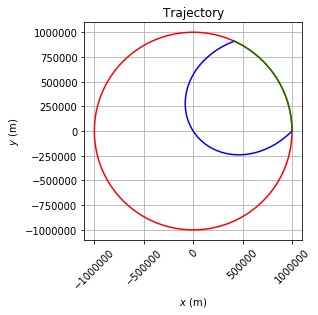

In [40]:
t_start = 0
t_end = 10000
nt = 10000
t = np.linspace(t_start, t_end, nt)
sol = odeint(dy_dt, y0, t, args=(omega,fcf))
r, _, phi, _ = sol.T

radius = sol[1,0]
k = 0
while abs(radius) < R and k < nt-1:
    k += 1
    radius = sol[k,0]
    
circ = np.linspace(0, 2*np.pi, nt)

# don't need to use a for loop here!
xcirc = R * np.cos(circ)
ycirc = R * np.sin(circ)    

plt.figure(1)
ax = plt.axes()
ax.set_aspect(1)
plt.plot(xcirc, ycirc, 'r')

x, y = r[:k]*np.cos(phi[:k]), r[:k]*np.sin(phi[:k])
plt.plot(x, y, 'b')

angle = np.arctan(y[-1]/x[-1])

# plot the arc covered by the projectile (used for height)
segment = np.linspace(0, angle, k)
xseg = R * np.cos(segment)
yseg = R * np.sin(segment)  
plt.plot(xseg, yseg, 'g')

plt.xlabel('$x\ (\mathrm{m})$')
plt.ylabel('$y\ (\mathrm{m})$')
plt.title("Trajectory")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [41]:
print(f"The angle where it lands relative to launch point is {int(angle*180/np.pi)}°")

The angle where it lands relative to launch point is 65°


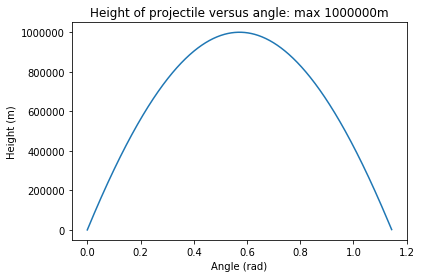

In [42]:
distances = np.sqrt((x-xseg)**2 + (y-yseg)**2)

plt.figure(2)
ax = plt.axes()
h_max = distances.max()
plt.plot(segment, distances)
plt.xlabel("Angle (rad)")
plt.ylabel("Height (m)")
plt.title(f"Height of projectile versus angle: max {int(h_max)}m")

plt.show()

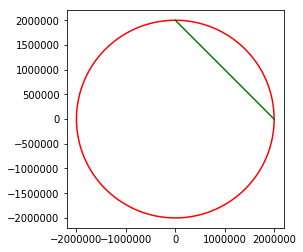

In [166]:
plt.figure(2)
ax = plt.axes()
ax.set_aspect(1)

plt.plot(xcirc, ycirc, 'r')
xx = np.linspace(0, R)
plt.plot(xx, -1*xx+R, 'g')

In [11]:
alt = R-r